#**ENVOLVENTE CONVEXA**
##Algoritmo de Jarvis

## Algoritmo de Graham

**pseudo código**

Entrada: tres o más puntos no colineales en un plano. (N mayor o igual que 3)

Respuesta: Lista ordenada con los puntos de los vértices de la envolvente convexa.

1. Ordenar la coordenada x de todos los puntos y seleccionar el menor.
(ordenar puntos según su coordenada horizontal)

  Seleccionar P0, que será el punto con menor coordenada x. Si hay varios puntos con la misma x mínima, elijo el de menor coordenada y.

2. Ordeno los N-1 puntos según la pendiente que corresponde al segmento formado con P0.

  [P1, P2, ... Pn-1]

  Si hay varios puntos con la misma pendiente selecciono únicamente el que está más lejos de P0.

3. Defino una pila (stack) vacía S para agregar los puntos.
4. Agrego P0 a S (append)
5. Agreggo P1 a S
6. Agrego P2 a S
7. for n=3 to N-1:
8. -> while: El ángulo de giro de los 3 últimos puntos No vayan a izquierda. (podría hacerse una funcion para saber si va a izq)

  -> -> s.pop(N-1) [elimino penultimo]
9. S.append(Pn)
10. imprimo S (respueta)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Point:
  #constructor
  def __init__(self, x, y, name):
    self.x = x
    self.y = y
    self.name = name

  #metodos de la clase
  def __repr__(self):
    return(f"({self.x}, {self.y})")

  def __str__(self):
    return(self.name)

In [2]:
#algoritmo de graham

p0 = Point(1,2,"p0")
p1 = Point(2,2,"p1")
p2 = Point(-3,4,"p2")
p3 = Point(10,1,"p3")
p4 = Point(2,7,"p4")
p5 = Point(3,2,"p5")
p6 = Point(4,5,"p6")

puntos = [p0, p1, p2, p3, p4, p5, p6]



In [3]:
def defP0(puntos): #definimos el punto inicial
  puntos2 = puntos.copy()
  punto_min = puntos[0]
  puntos = puntos[1:]
  for i in puntos:
    if i.x < punto_min.x:
      punto_min = i
    elif i.x == punto_min.x and i.y < punto_min.y:
      punto_min = i
  puntos = puntos2
  return punto_min

In [4]:
def slope(p1, p2):
  return (p2.y - p1.y)/(p2.x-p1.x)

def dist(p1,p2):
  return np.sqrt((p2.y-p1.y)**2+(p2.x-p1.x)**2)

In [5]:
def slopes_and_dist(p0,puntos):
  puntos2 = puntos.copy()
  puntos.remove(p0)
  pendientes = []
  distancias = []
  for i in puntos:
    m = slope(p0, i)
    d = dist(p0, i)
    pendientes.append(m)
    distancias.append(d)
  puntos = puntos2
  return pendientes, distancias

In [6]:
def sort_slopes(pendientes, puntos, distancias):
  puntos2 = puntos.copy()
  ind = 0
  min_slope= pendientes[0]
  sorted_points = []
  while len(pendientes) != 0:
    for i in range(1, len(pendientes)):
      if pendientes[i] < min_slope:
        min_slope = pendientes[i]
        ind = i
      elif pendientes[i] == min_slope and distancias[i] > distancias[ind]:
        #selecciono unicamente el de mayor distancia
        pendientes.pop(ind)
        distancias.pop(ind)
        puntos.pop(ind)
        min_slope = pendientes[i]
        ind = i
    sorted_points.append(puntos[ind])
    pendientes.pop(ind)
    distancias.pop(ind)
    puntos.pop(ind)
  puntos = puntos2
  return sorted_points

In [7]:
def cross(p0, p1, p2): #origen comun, p1 , p2
  return((p1.x - p0.x)*(p2.y- p0.y)- (p2.x - p0.x)*(p1.y-p0.y))

def giro(p0, p1, p2): #origen, p1,p2
  if cross(p0, p1, p2)>0:
    return 1 #derecha
    #print(f"{p1} está rotado en sentido horario respecto a {p2}, con {p0} como origen")
  elif cross(p0, p1, p2) < 0:
    return 2 #izquierda
    #print(f"{p1} está rotado en sentido anti-horario respecto a {p2}, con {p0} como origen")
  else:
    return 1
    #print(f"{p1}, {p2} y {p0} son colineales")

In [8]:
def graham(puntos):
  puntos2 = puntos.copy()
  p0 = defP0(puntos)
  [ms, ds] = slopes_and_dist(p0, puntos)
  sorted_points = sort_slopes(ms, puntos, ds)
  S = [p0, sorted_points[0], sorted_points[1]]  #añadimos p0, p1 y p2
  for i in range(2, len(sorted_points)):
    while giro(S[-2], sorted_points[i], S[-1]) == 1:
        S.pop()
    S.append(sorted_points[i])
  puntos = puntos2
  return S

In [9]:
poli = graham(puntos)

Graficamos

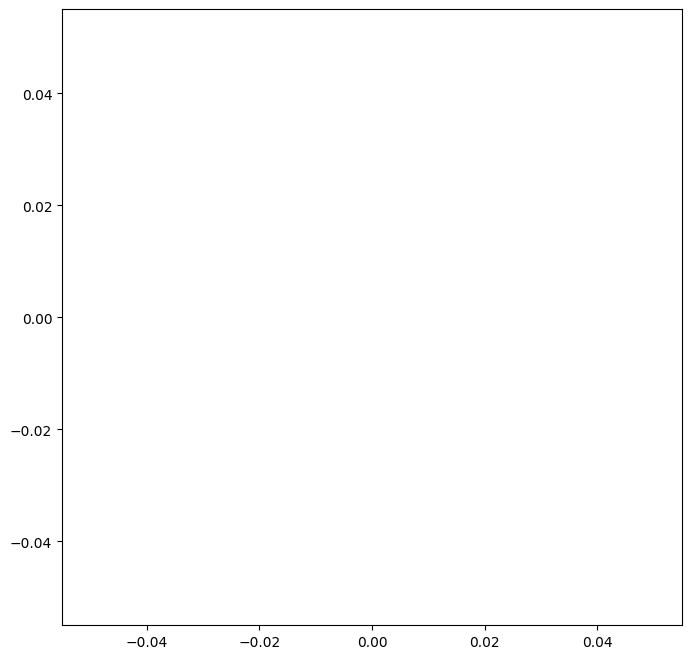

In [10]:
def graficar_puntos(puntos):
  x = [p[0] for p in puntos]
  y = [p[1] for p in puntos]
  plt.scatter(x, y, color='purple', marker='o')


plt.figure(figsize=(8,8))
graficar_puntos(puntos)
plt.show()

## Solución propuesta


In [24]:
def pen(x1,y1,x2,y2):
  m = (y2-y1)/(x2-x1)
  return m

def prodCruz(x0, y0, x1,y1,x2,y2):
  c = (x1-x0)*(y2-y0) - (x2-x0)*(y1-y0)
  return c

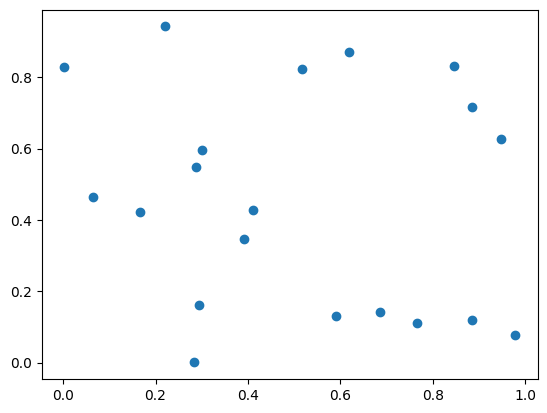

In [25]:
N = 20
np.random.seed(23)
x = np.round(np.random.rand(N),4)
y = np.round(np.random.rand(N),4)


plt.scatter(x,y)
plt.show()

In [13]:
P = []
for n in range(N):
  P.append(["P"+str(n),x[n], y[n], 0]) #va a serconveniente que lospuntos tengan etiquetas
print(P)

[['P0', 0.5173, 0.8225, 0], ['P1', 0.947, 0.6262, 0], ['P2', 0.7655, 0.1105, 0], ['P3', 0.2824, 0.0005, 0], ['P4', 0.221, 0.9422, 0], ['P5', 0.6862, 0.1415, 0], ['P6', 0.1671, 0.4216, 0], ['P7', 0.3924, 0.3465, 0], ['P8', 0.6181, 0.8698, 0], ['P9', 0.4119, 0.4286, 0], ['P10', 0.0025, 0.8288, 0], ['P11', 0.884, 0.7179, 0], ['P12', 0.8849, 0.1192, 0], ['P13', 0.3004, 0.5964, 0], ['P14', 0.5896, 0.1298, 0], ['P15', 0.9784, 0.0775, 0], ['P16', 0.8451, 0.8312, 0], ['P17', 0.0651, 0.4644, 0], ['P18', 0.2947, 0.162, 0], ['P19', 0.2879, 0.548, 0]]


In [14]:
#otra forma de escribir funciones
#def f(x):
# return x**2

#f = lambda x:x**2

#ese es el equivalente a funciones

coord = lambda P: P[1]
P.sort(key = coord)
P

[['P10', 0.0025, 0.8288, 0],
 ['P17', 0.0651, 0.4644, 0],
 ['P6', 0.1671, 0.4216, 0],
 ['P4', 0.221, 0.9422, 0],
 ['P3', 0.2824, 0.0005, 0],
 ['P19', 0.2879, 0.548, 0],
 ['P18', 0.2947, 0.162, 0],
 ['P13', 0.3004, 0.5964, 0],
 ['P7', 0.3924, 0.3465, 0],
 ['P9', 0.4119, 0.4286, 0],
 ['P0', 0.5173, 0.8225, 0],
 ['P14', 0.5896, 0.1298, 0],
 ['P8', 0.6181, 0.8698, 0],
 ['P5', 0.6862, 0.1415, 0],
 ['P2', 0.7655, 0.1105, 0],
 ['P16', 0.8451, 0.8312, 0],
 ['P11', 0.884, 0.7179, 0],
 ['P12', 0.8849, 0.1192, 0],
 ['P1', 0.947, 0.6262, 0],
 ['P15', 0.9784, 0.0775, 0]]

In [15]:
Pmin = P[0]
Pmin

['P10', 0.0025, 0.8288, 0]

In [16]:
#graficamos

In [17]:
P[0][3]= -np.inf
for n in range (1,N):
  P[n][3] = pen(P[0][1], P[0][2], P[n][1], P[n][2])

slope = lambda P:P[3]
P.sort(key = slope)
P

[['P10', 0.0025, 0.8288, -inf],
 ['P17', 0.0651, 0.4644, -5.82108626198083],
 ['P3', 0.2824, 0.0005, -2.959271168274384],
 ['P6', 0.1671, 0.4216, -2.473876063183475],
 ['P18', 0.2947, 0.162, -2.281998631074606],
 ['P7', 0.3924, 0.3465, -1.236983842010772],
 ['P14', 0.5896, 0.1298, -1.1905978538579456],
 ['P5', 0.6862, 0.1415, -1.0052654673102237],
 ['P19', 0.2879, 0.548, -0.9838822704975472],
 ['P9', 0.4119, 0.4286, -0.9775280898876405],
 ['P2', 0.7655, 0.1105, -0.9414154652686761],
 ['P12', 0.8849, 0.1192, -0.8041704442429737],
 ['P13', 0.3004, 0.5964, -0.7801275595837528],
 ['P15', 0.9784, 0.0775, -0.7698534685930934],
 ['P1', 0.947, 0.6262, -0.21450502911593436],
 ['P11', 0.884, 0.7179, -0.12580828133862734],
 ['P0', 0.5173, 0.8225, -0.012237762237762182],
 ['P16', 0.8451, 0.8312, 0.002848326608117812],
 ['P8', 0.6181, 0.8698, 0.066601689408707],
 ['P4', 0.221, 0.9422, 0.518993135011442]]

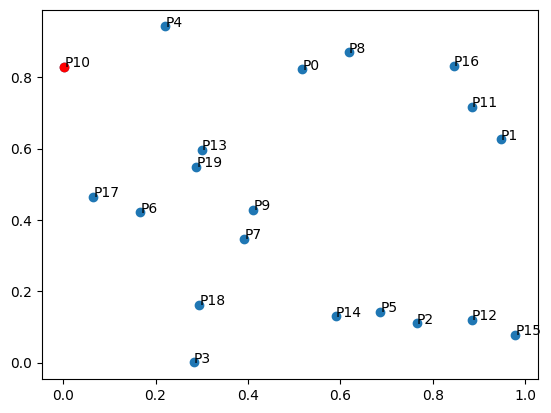

In [18]:
plt.scatter(x,y)
plt.plot(Pmin[1], Pmin[2], "ro")
for n in range(N):
  plt.annotate(P[n][0], xy= (P[n][1], P[n][2]))
plt.show()

In [26]:
Pol = []
for n in range(N):
  Pol.append(P[n])
Pol.append(P[0])

def hull():
  xcor = []
  ycor = []
  for n in range(len(Pol)):
    xcor.append(Pol[n][1])
    ycor.append(Pol[n][2])

  plt.scatter(x,y)
  plt.plot(Pmin[1], Pmin[2], "ro")
  for n in range(N):
    plt.annotate(P[n][0], xy= (P[n][1], P[n][2]))
  plt.plot(xcor, ycor)
  plt.show()

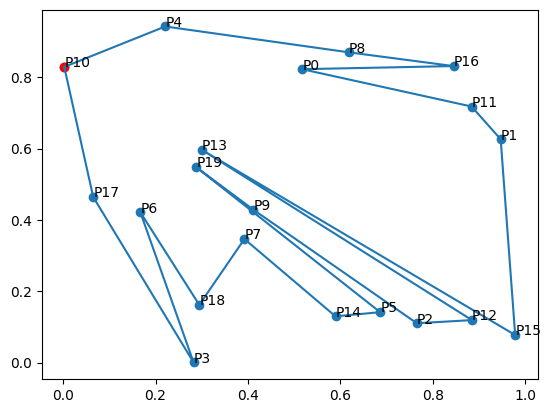

In [20]:
hull()

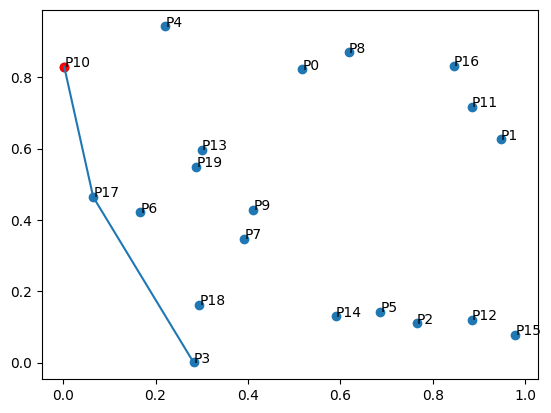

P17 0.05014398


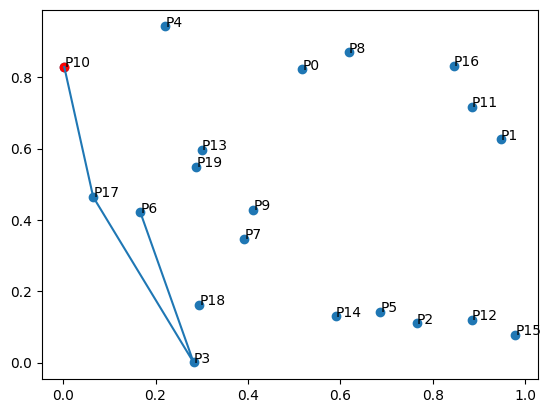

P3 0.03801735999999999


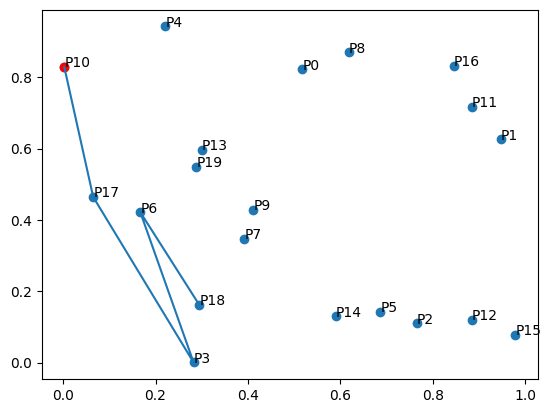

P6 -0.023800480000000013


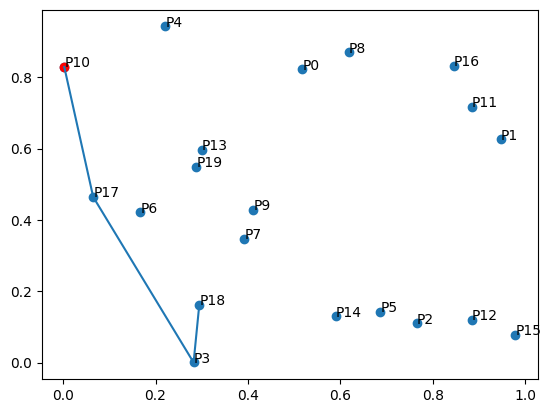

P3 0.04079992000000002


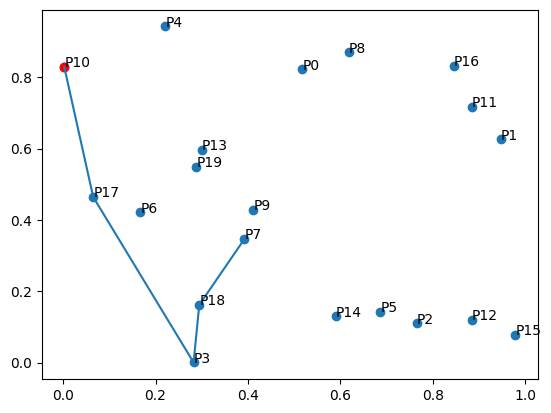

P18 -0.013509199999999996


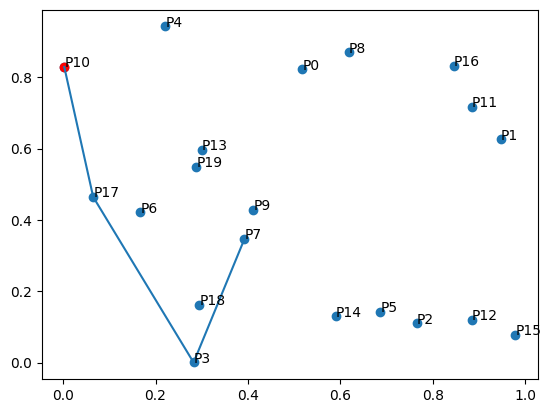

P3 0.1262148


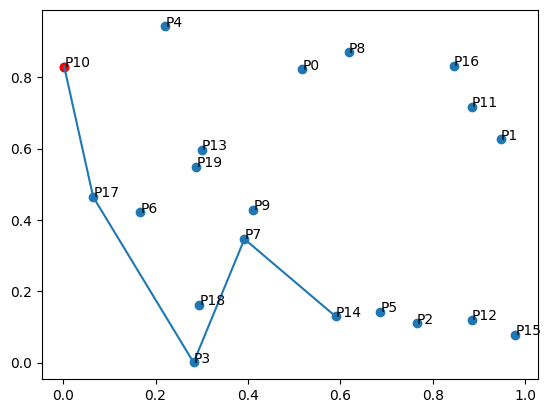

P7 -0.0920682


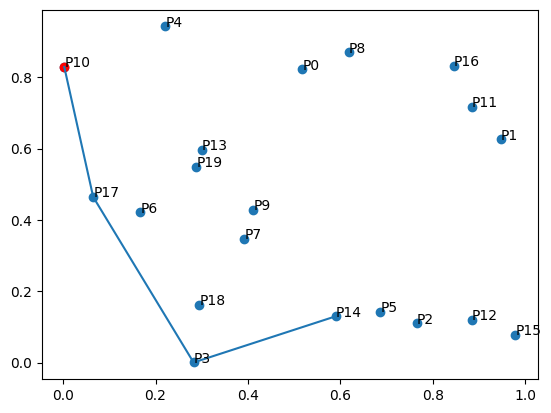

P3 0.17060696999999997


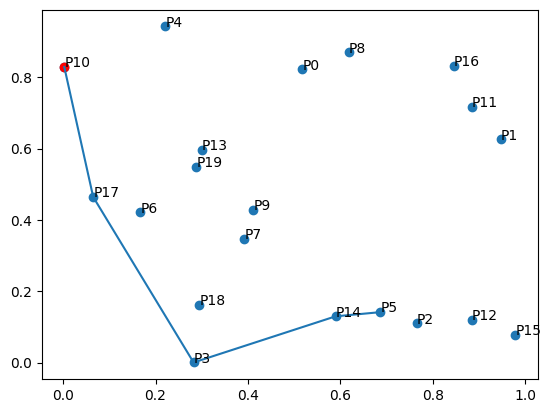

P14 -0.00889614000000001


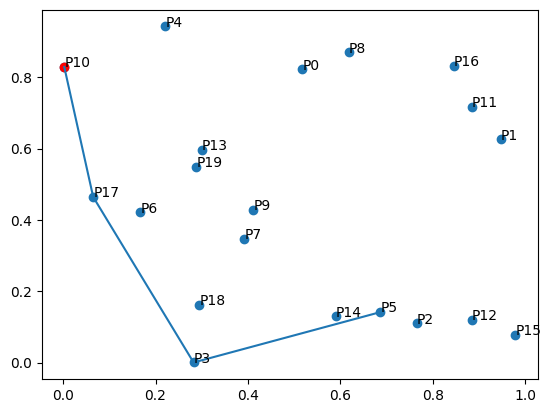

P3 0.21796211999999998


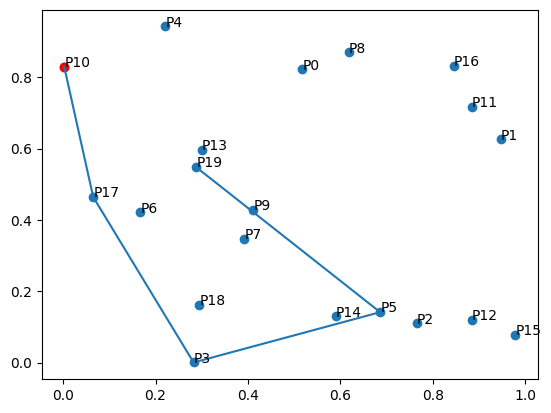

P5 0.22030500000000006


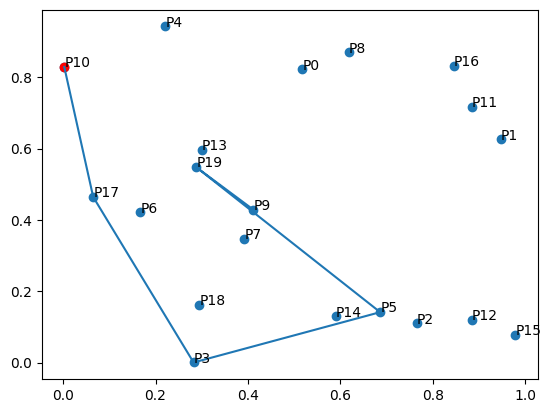

P19 -0.002848979999999973


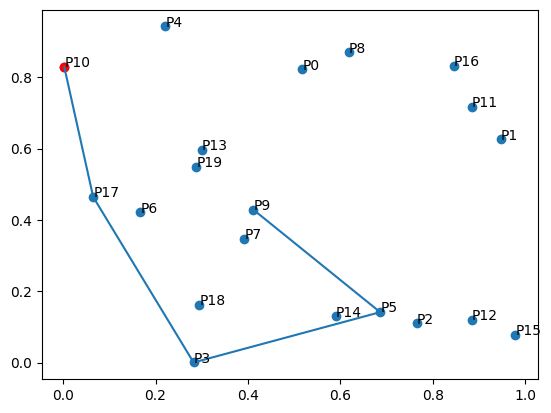

P5 0.15460728


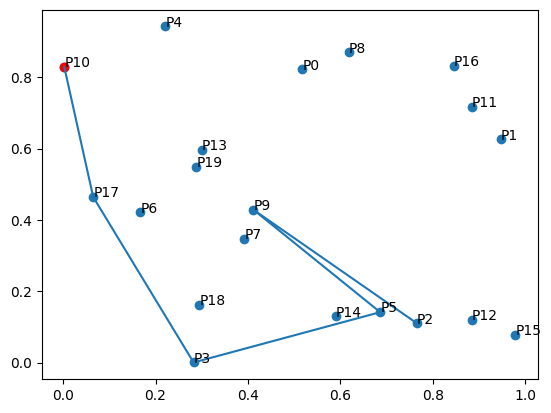

P9 -0.014263729999999983


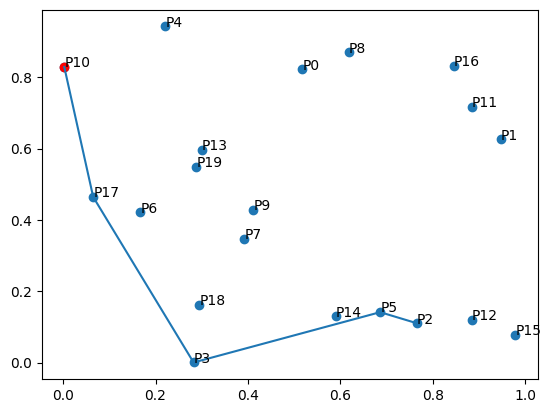

P5 -0.02369909999999998


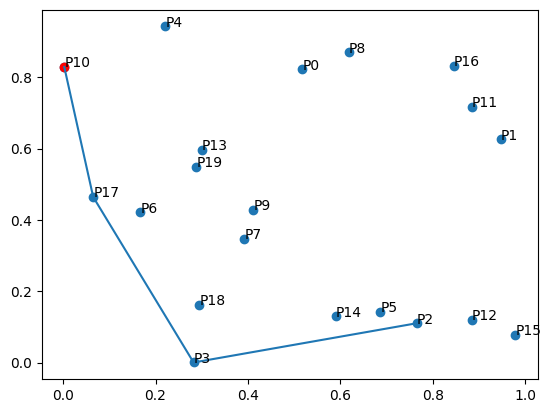

P3 0.24801308999999994


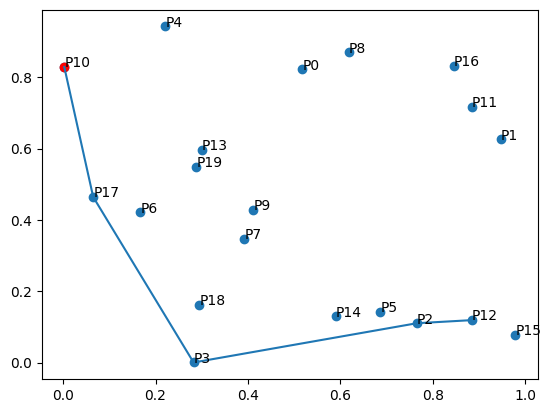

P2 -0.008931030000000006


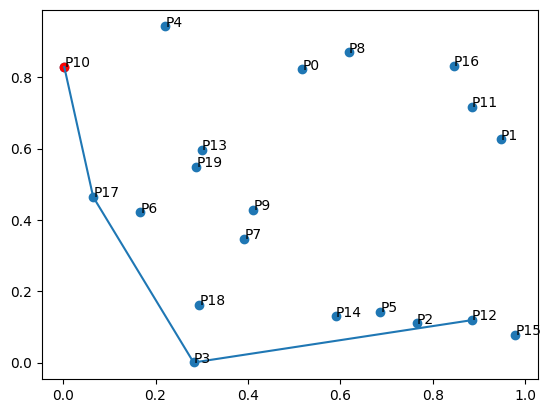

P3 0.30529325999999996


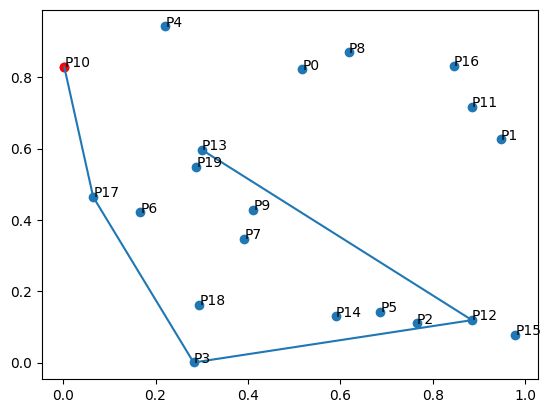

P12 0.3568931500000001


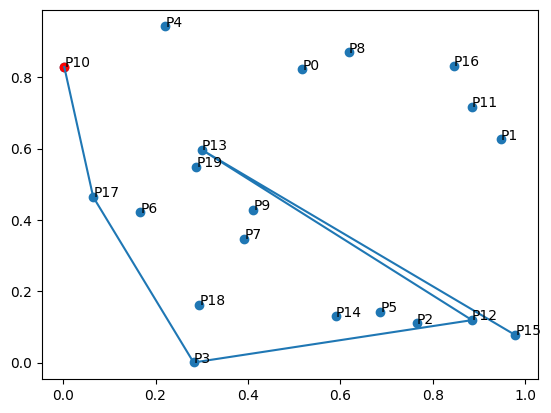

P13 -0.020244550000000017


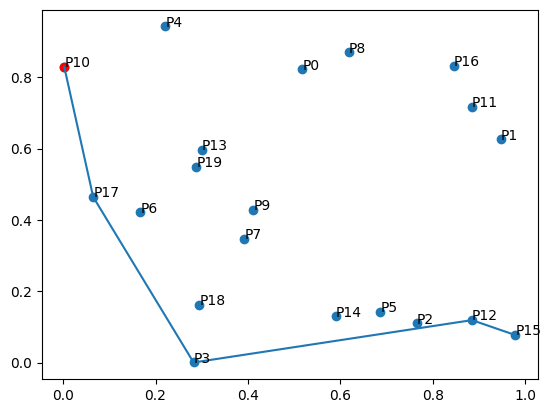

P12 -0.03622270000000001


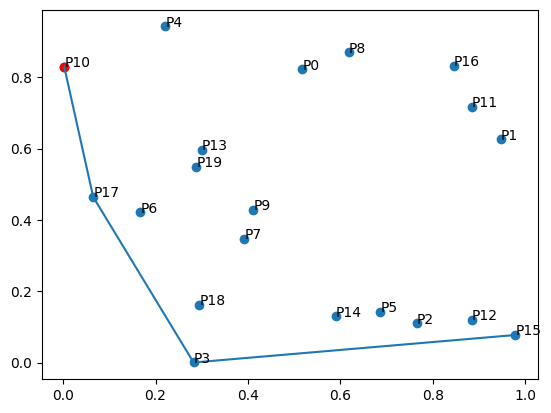

P3 0.3396065


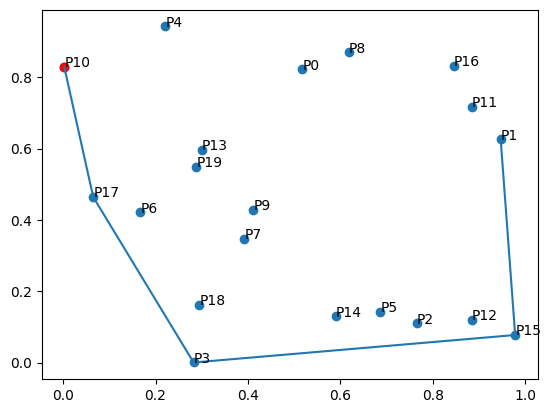

P15 0.38431300000000007


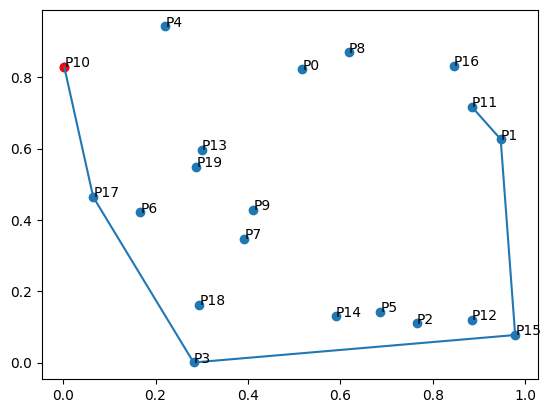

P1 0.031688719999999955


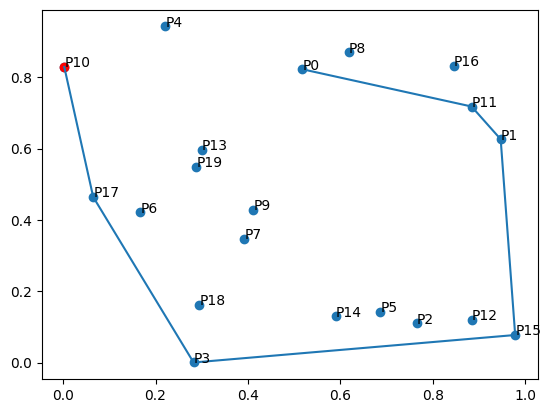

P11 0.027036590000000006


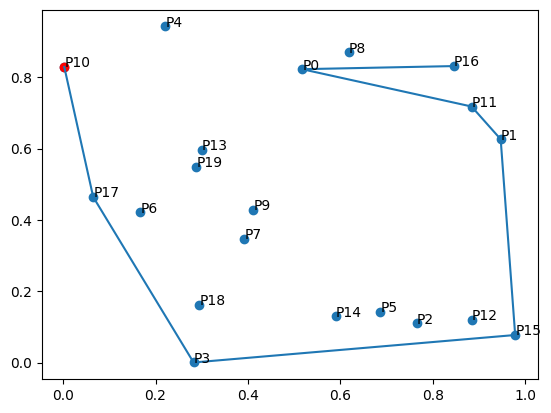

P0 -0.03747817000000002


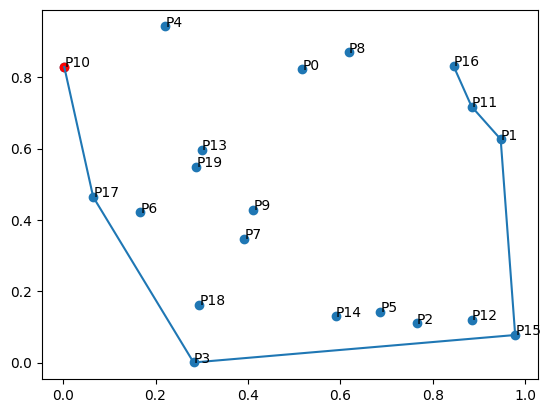

P11 -0.003570769999999992


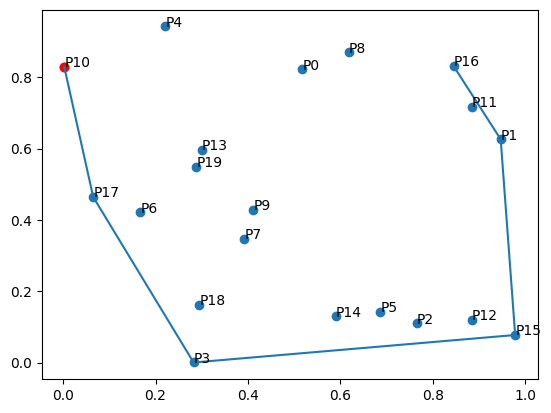

P1 0.04947552999999997


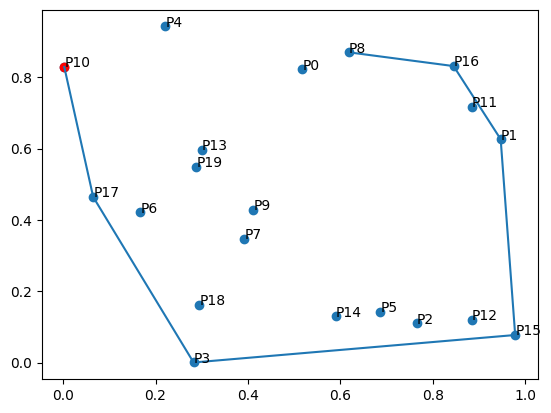

P16 0.04260166000000001


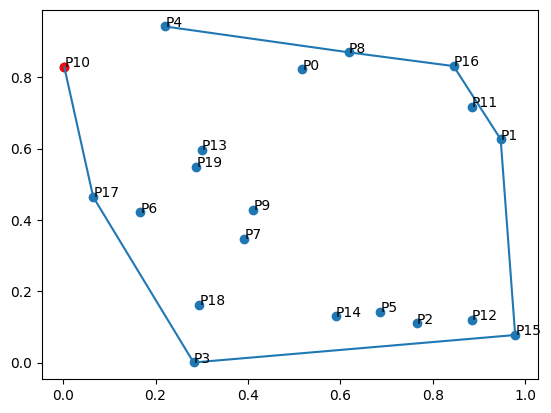

P8 -0.0011067400000000158


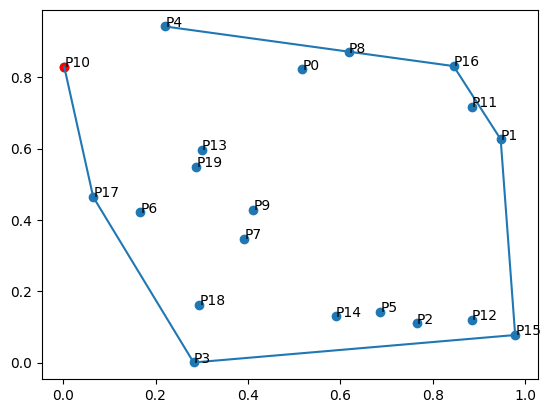

P16 0.11662960000000004


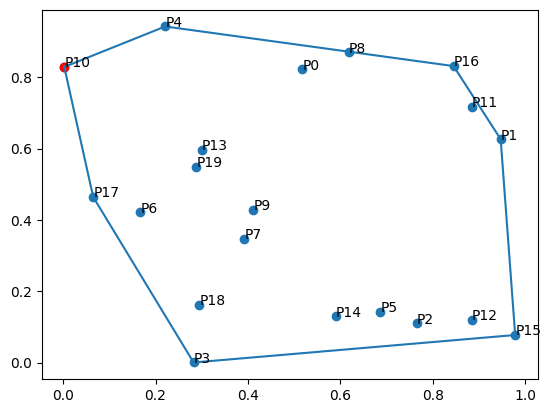

In [23]:
Pc = P.copy()
Pc.append(Pmin)
Pol = [Pc[0], Pc[1], Pc[2]]
for n in range(3):
  Pc.pop(0)

while len(Pc)>0:
  hull()
  d = prodCruz(Pol[-3][1], Pol[-3][2], Pol[-2][1], Pol[-2][2], Pol[-1][1], Pol[-1][2])
  print(Pol[-2][0], d)
  while d <= 0:
    Pol.pop(len(Pol)-2)
    hull()
    d = prodCruz(Pol[-3][1], Pol[-3][2], Pol[-2][1], Pol[-2][2], Pol[-1][1], Pol[-1][2])
    print(Pol[-2][0], d)
  else:
    if len(Pc)>0:
      Pol.append(Pc[0])
      Pc.pop(0)
hull()

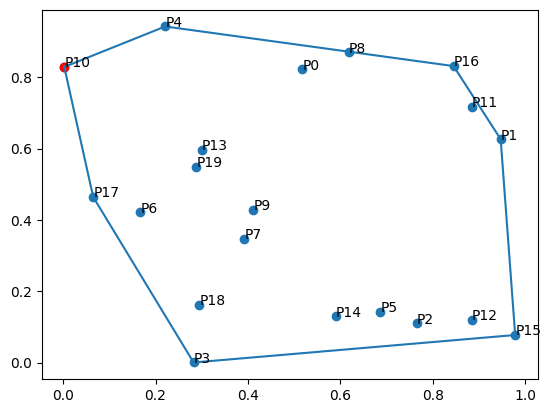

In [22]:
hull()